In [1]:
import os

In [2]:
os.makedirs('artifacts', exist_ok=True)

In [3]:
os.makedirs('artifacts\data', exist_ok=True)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set_theme(style='darkgrid',palette='viridis')

In [5]:
df = pd.read_csv('artifacts\data\Titanic_train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

## Handling Missing Values

In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [13]:
def lower_text(text):
    return text.lower()

In [14]:
df['Sex']= df['Sex'].map(lower_text)

In [15]:
def find_error(text):
    if type(text) == 'str':
        pass
    else:
        print('Error in data type of column Embarked')
        print(f'Value: {text}')

In [16]:
df['Embarked'].map(find_error)

Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: C
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: Q
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: C
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: Q
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: S
Error in data type of column Embarked
Value: C
Error in data type of column Embarked
Value: S
Error in data

0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Name: Embarked, Length: 891, dtype: object

In [17]:
df['Embarked']= df['Embarked'].astype('str')

In [18]:
df['Embarked'] = df['Embarked'].map(lower_text)

## Handling Outliers

<Axes: >

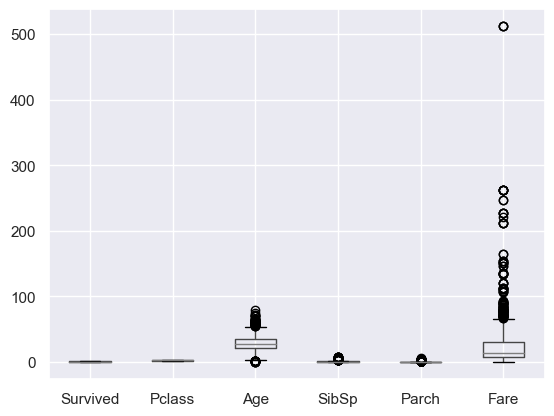

In [19]:
df.boxplot()

In [20]:
def Outliers(df,column):
    for col in column:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      low_ext = Q1 - 1.5 * IQR
      upp_ext = Q3 + 1.5 * IQR
      df[col] = np.where(df[col]> upp_ext,upp_ext,np.where(df[col]< low_ext,low_ext,df[col]))
      

In [21]:
Outliers(df,df.iloc[:,3:4])

In [22]:
Outliers(df,df.iloc[:,6:7])

## Histogram 

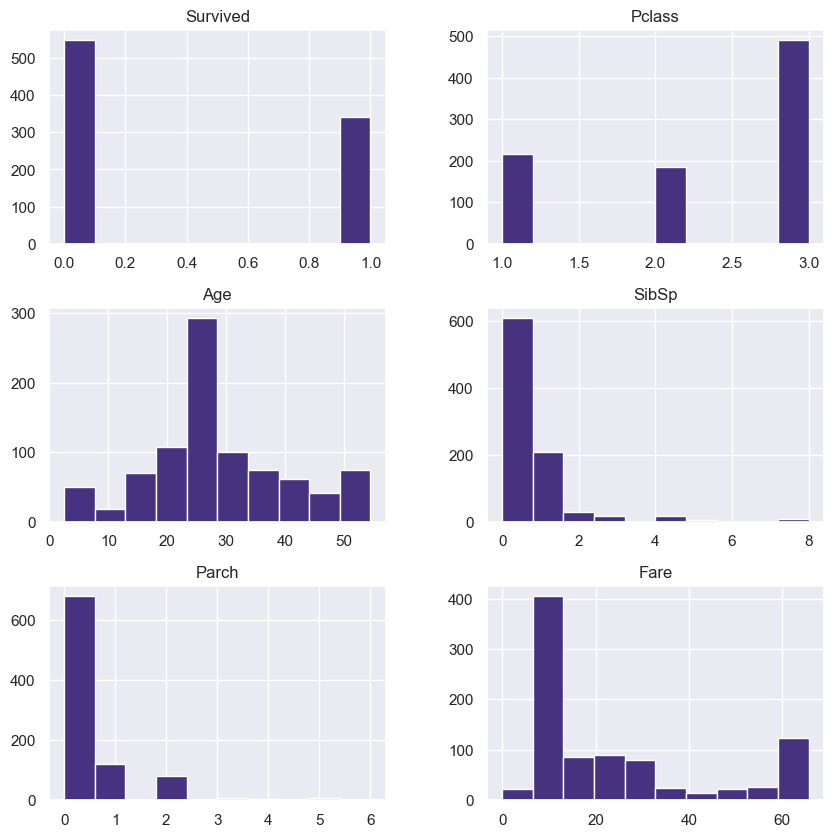

In [23]:
df.hist(figsize=(10,10),)
plt.show()

## Scatter plot

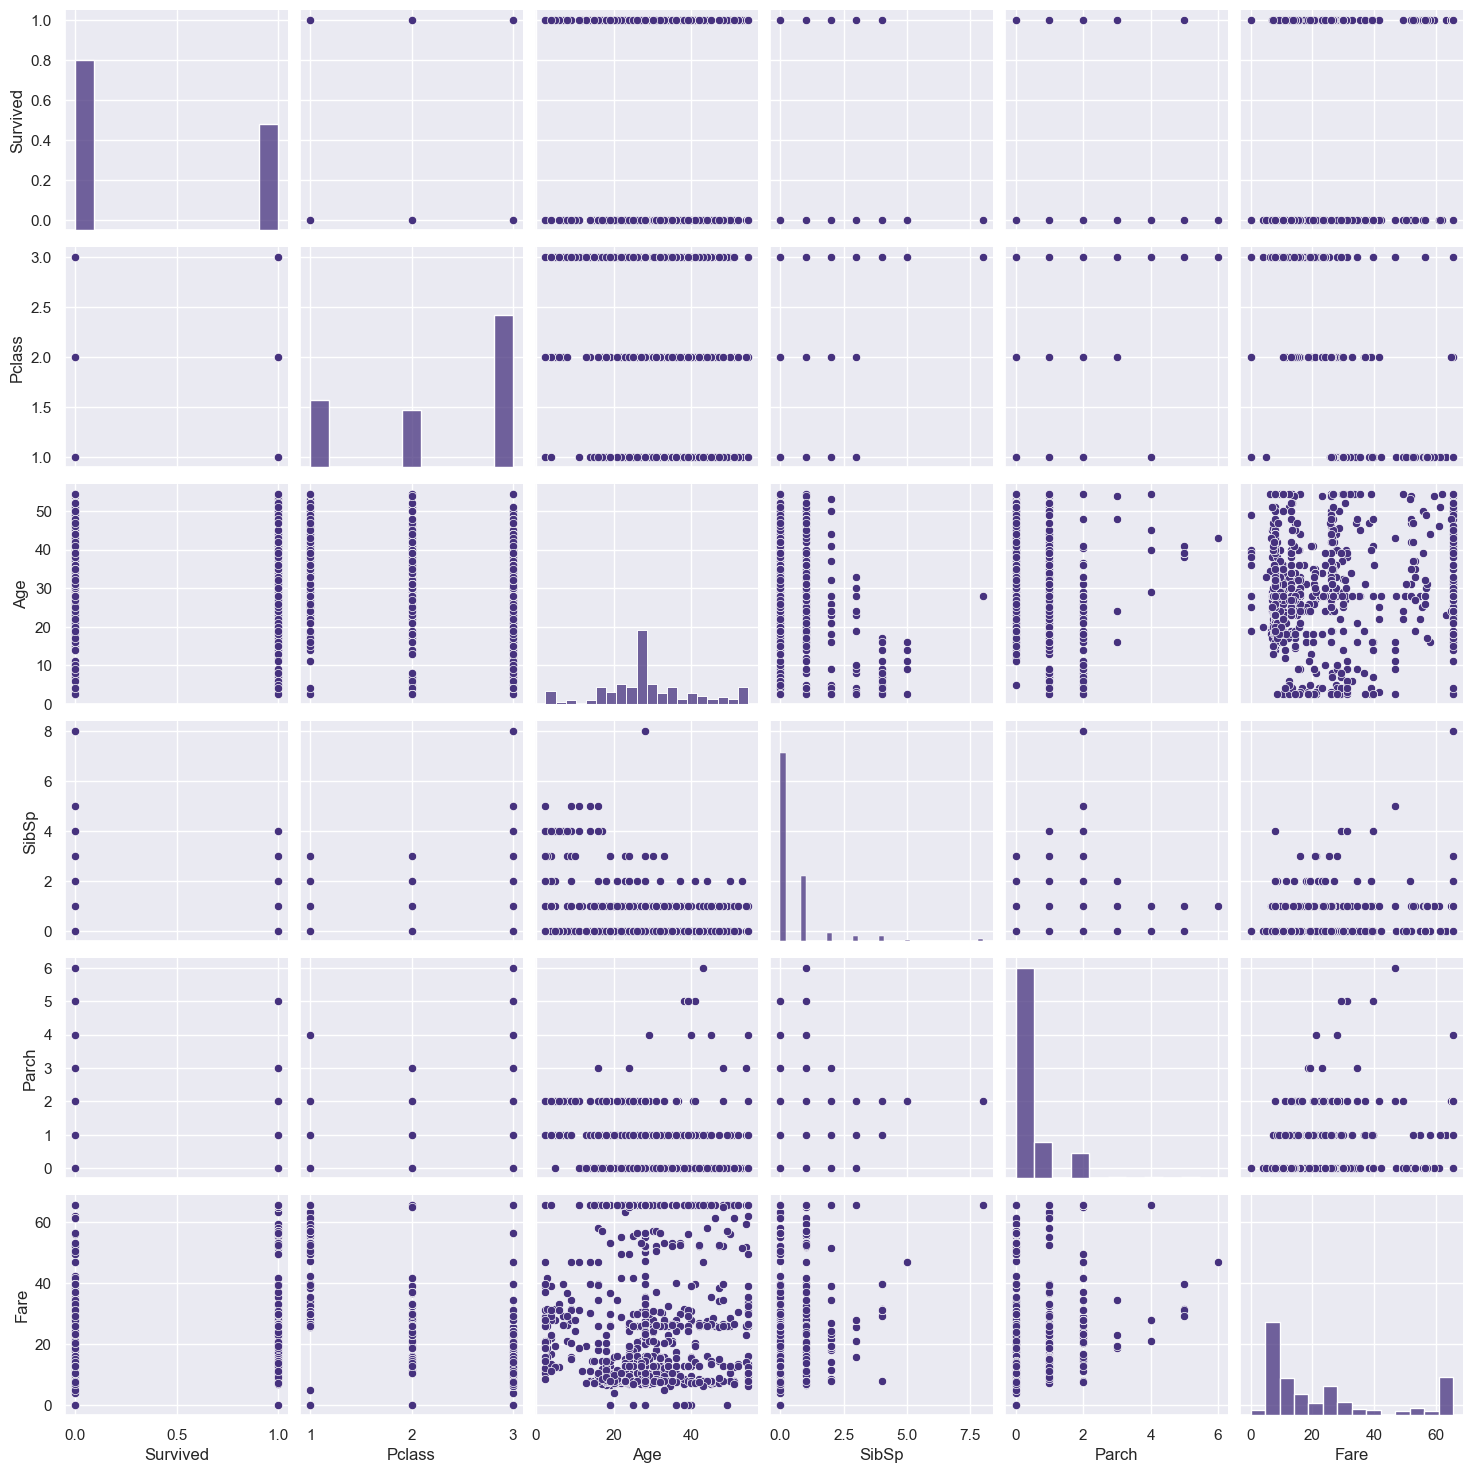

In [24]:
sns.pairplot(df)
plt.show()

## Coorelation Metrics 

In [25]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.060622,-0.035322,0.081629,0.317430
Pclass,-0.338481,1.000000,-0.340404,0.083081,0.018443,-0.715300
Age,-0.060622,-0.340404,1.000000,-0.239601,-0.178959,0.144544
SibSp,-0.035322,0.083081,-0.239601,1.000000,0.414838,0.332021
Parch,0.081629,0.018443,-0.178959,0.414838,1.000000,0.292616
Fare,0.317430,-0.715300,0.144544,0.332021,0.292616,1.000000


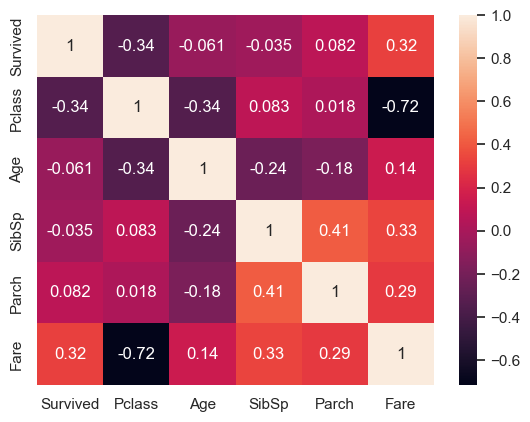

In [26]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [19]:
cat_cols = df[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]

In [20]:
num_cols = df[['Age','Fare']]

In [21]:
cat_cols = pd.get_dummies(cat_cols,dtype=int)

In [22]:
scaler = StandardScaler()

In [23]:
num_cols_scaled = scaler.fit_transform(num_cols[['Age','Fare']])

In [24]:
num_cols_scaled = pd.DataFrame(data=num_cols_scaled,columns=scaler.get_feature_names_out())

In [25]:
Final_df = pd.concat([cat_cols,num_cols_scaled],axis=1)

In [26]:
x = Final_df.drop(columns=['Survived'])
x.shape

(891, 10)

In [27]:
y = Final_df['Survived']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [29]:
LR = LogisticRegression()

In [30]:
LR.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred_test = LR.predict(x_test)

In [32]:
y_pred_train = LR.predict(x_train)

In [33]:
Acc_test = accuracy_score(y_test,y_pred_test)

In [34]:
Acc_train = accuracy_score(y_train,y_pred_train)

In [35]:
print('Training_Accuracy:-',Acc_train)
print('Test_Accuracy:-',Acc_test)

Training_Accuracy:- 0.7986577181208053
Test_Accuracy:- 0.8135593220338984


## Pipeline

In [36]:
x = df.drop(columns=['Survived'])

In [37]:
y  = df['Survived']

In [38]:
x_train_pipe,x_test_pipe,y_train_pipe,y_test_pipe = train_test_split(x,y,test_size=0.33,random_state=42)

In [39]:
x_train_pipe

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,1,male,54.0,0,0,51.8625,s
718,3,male,28.0,0,0,15.5000,q
685,2,male,25.0,1,2,41.5792,c
73,3,male,26.0,1,0,14.4542,c
882,3,female,22.0,0,0,10.5167,s
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,s
270,1,male,28.0,0,0,31.0000,s
860,3,male,41.0,2,0,14.1083,s
435,1,female,14.0,1,2,120.0000,s


In [40]:
cat_cols1 = ['Sex','Embarked']
num_cols1 = ['Age','Fare']

In [41]:
num_pipe = Pipeline([('imputer_num',SimpleImputer()),('scaler',StandardScaler())])

In [42]:
cat_pipe = Pipeline([('imputer_cat',SimpleImputer(strategy='most_frequent')),('OHE',OneHotEncoder())])

In [43]:
processor_pipe = ColumnTransformer([('num',num_pipe,num_cols1),('cat',cat_pipe,cat_cols1)])

In [44]:
model_pipe = Pipeline([('processor_pipe',processor_pipe),('LR',LogisticRegression())])

In [45]:
model_pipe.fit(x_train_pipe,y_train_pipe)

Pipeline(steps=[('processor_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked'])])),
                ('LR', LogisticRegression())])

In [46]:
model_pipe.predict(x_train_pipe)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [47]:
import pickle

In [48]:
pickle.dump(model_pipe,open('model.pkl','wb'))